# Image Classification using TensorFlow

In this project, I have created a Keras Sequential Model for classifiying images belonging to 5 different flower species. The deep learning model is trained on data obtained from TensorFlow Library containing 3700 images of 5 flower species: Roses, Daisy, Dandelion, Sunflowers & Tulips. Accuracy is used as a metric to evaluate the performance of the model.
Further to improve the accuracy, I have also applied Transfer Learning using pre-trained models from TensorFlow Hub.

### Contents
<ol>
    <li> Importing Libraries & Downloading Data</li>
    <li> Data Exploration </li>
    <li> Data Preparation & Pre-processing </li>
    <li> Training the Model </li>
    <li> Transfer Learning </li>
    <li> Summary </li>
</ol>

### Importing Libraries

In [73]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os 
import PIL 
import tensorflow as tf 
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential


The data is downloaded from TensorFlow Library. The folder containing the images is unzipped in the current directory.

In [2]:
dataset_url = "http://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir=".",untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib 
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob("*/*.jpg")))

3670

There are a total of 3670 images available.

### Data Exploration

Each flower species is stored separately as a list. A flower from each species is visualized. 

In [6]:
roses = list(data_dir.glob("roses/*"))
tulips = list(data_dir.glob("tulips/*"))
sunflowers = list(data_dir.glob("sunflowers/*"))
dandelion = list(data_dir.glob("dandelion/*"))
daisy = list(data_dir.glob("daisy/*"))

#### Roses

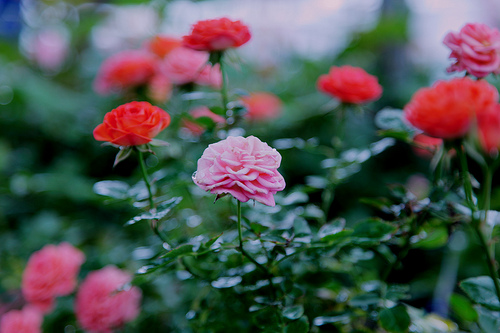

In [7]:
PIL.Image.open(str(roses[1]))

#### Tulips

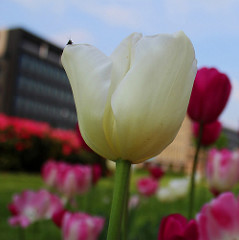

In [8]:
PIL.Image.open(str(tulips[1]))

#### Dandelion

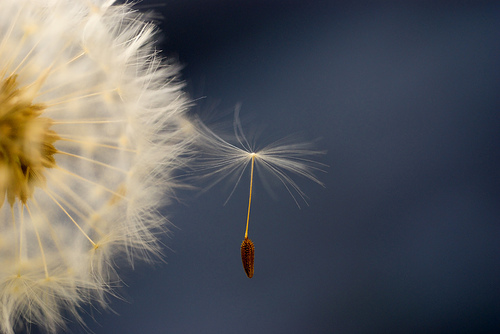

In [9]:
PIL.Image.open(str(dandelion[1]))

#### Sunflower

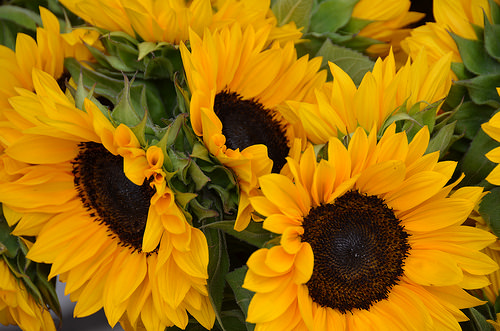

In [10]:
PIL.Image.open(str(sunflowers[1]))

#### Daisy

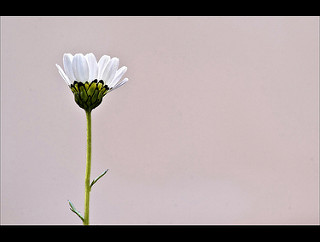

In [11]:
PIL.Image.open(str(daisy[1]))

In [12]:
flowers_img_dict = {
    'roses' : roses,
    'daisy' : daisy,
    'sunflowers' : sunflowers,
    'dandelion' : dandelion,
    'tulips':tulips
}

In [13]:
flowers_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'sunflowers' : 3,
    'dandelion' : 2,
    'tulips':4
}

In [14]:
cv2.imread(str(flowers_img_dict['roses'][0])).shape

(243, 500, 3)

### Data Preparation and Preprocessing

As visible from above, the size of every image is different. Each image is resized to 180 X 180.

In [15]:
x, y = [],[]

for flower_name, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [16]:
x = np.array(x)
y = np.array(y)

The data is split into training and test sets. Further, the pixel values range from 0 to 255, these are scaled between 0 and 1.

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [18]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

### Training the Model

The sequential model contains three convolution blocks with max pooling layers. The convolution block is connected to a dense layer with 128 units with a ReLU activation function. 
The model is optimised using Adam and Sparse Categorical Cross Entropy is used as the loss function. 

In [19]:
model = Sequential([
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])

model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model_result = model.fit(x_train_scaled, y_train, epochs = 15, validation_data=(x_test_scaled, y_test))

2022-01-05 22:33:30.261973: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/15
86/86 [==============================] - 47s 523ms/step - loss: 1.3329 - accuracy: 0.4339 - val_loss: 1.0778 - val_accuracy: 0.5479
Epoch 2/15
86/86 [==============================] - 42s 483ms/step - loss: 0.9596 - accuracy: 0.6301 - val_loss: 1.0877 - val_accuracy: 0.5806
Epoch 3/15
86/86 [==============================] - 41s 472ms/step - loss: 0.7932 - accuracy: 0.7024 - val_loss: 0.8843 - val_accuracy: 0.6558
Epoch 4/15
86/86 [==============================] - 41s 472ms/step - loss: 0.5748 - accuracy: 0.7929 - val_loss: 0.8661 - val_accuracy: 0.6678
Epoch 5/15
86/86 [==============================] - 41s 480ms/step - loss: 0.3611 - accuracy: 0.8706 - val_loss: 0.9046 - val_accuracy: 0.6699
Epoch 6/15
86/86 [==============================] - 43s 495ms/step - loss: 0.1903 - accuracy: 0.9379 - val_loss: 1.1080 - val_accuracy: 0.6841
Epoch 7/15
86/86 [==============================] - 42s 491ms/step - loss: 0.0986 - accuracy: 0.9735 - val_loss: 1.2433 - val_accuracy: 0.6471

In [20]:
train_loss = model_result.history['loss']
train_accuracy = model_result.history['accuracy']

val_loss = model_result.history['val_loss']
val_accuracy = model_result.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Accuracy')

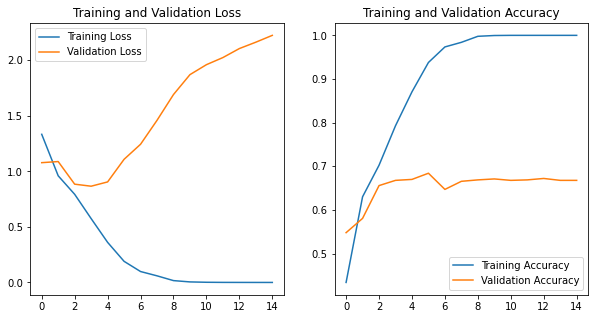

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1,2,2)
plt.plot(train_accuracy, label = "Training Accuracy")
plt.plot(val_accuracy, label = "Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")


In [22]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 4s 125ms/step - loss: 2.2230 - accuracy: 0.6678


[2.222954034805298, 0.6677560210227966]

The model however achieves low accuracy on the test dataset. The validation accuracy also doesn't increase with epochs indicating overfitting. Overfitting can be addressed by Data Augmentation techniques. Overfitting is caused by a smaller training dataset. Data Augmentation increases the training dataset by applying random transformations over exiting images - such as rotation, flipping, zooming etc. This helps the model to generalise better.

I have applied random zoom, flipping and rotation to generate more images for training in the augmentation layer. Dropout regularization has also been applied to reduce overfitting.

### Training the Model after Data Augmentation

In [23]:
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomFlip(mode = 'horizontal'),
    tf.keras.layers.RandomRotation(0.25)
])

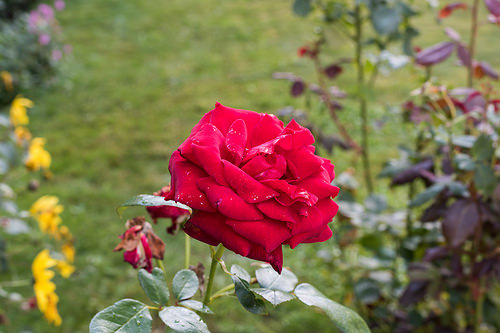

In [42]:
PIL.Image.open(str(roses[3]))

Consider rewriting this model with the Functional API.


(-0.5, 499.5, 332.5, -0.5)

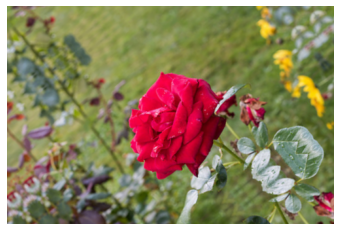

In [72]:
rose_augmented = data_augmentation(PIL.Image.open(str(roses[3])))
plt.imshow(rose_augmented.numpy().astype("uint8"))
plt.axis("off")

In [24]:
model1 = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])

model1.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model1_result = model1.fit(x_train_scaled, y_train, epochs = 30, validation_data=(x_test_scaled, y_test))

Epoch 1/30
86/86 [==============================] - 52s 594ms/step - loss: 1.3937 - accuracy: 0.3975 - val_loss: 1.0993 - val_accuracy: 0.5294
Epoch 2/30
86/86 [==============================] - 49s 567ms/step - loss: 1.1206 - accuracy: 0.5294 - val_loss: 1.0265 - val_accuracy: 0.5817
Epoch 3/30
86/86 [==============================] - 49s 571ms/step - loss: 1.0260 - accuracy: 0.5974 - val_loss: 0.9719 - val_accuracy: 0.5969
Epoch 4/30
86/86 [==============================] - 51s 591ms/step - loss: 0.9670 - accuracy: 0.6286 - val_loss: 0.9127 - val_accuracy: 0.6264
Epoch 5/30
86/86 [==============================] - 50s 586ms/step - loss: 0.9255 - accuracy: 0.6392 - val_loss: 0.8700 - val_accuracy: 0.6416
Epoch 6/30
86/86 [==============================] - 48s 555ms/step - loss: 0.8721 - accuracy: 0.6570 - val_loss: 0.9057 - val_accuracy: 0.6275
Epoch 7/30
86/86 [==============================] - 53s 611ms/step - loss: 0.8650 - accuracy: 0.6483 - val_loss: 0.8408 - val_accuracy: 0.6558

Text(0.5, 1.0, 'Training and Validation Accuracy after Data Augmentation')

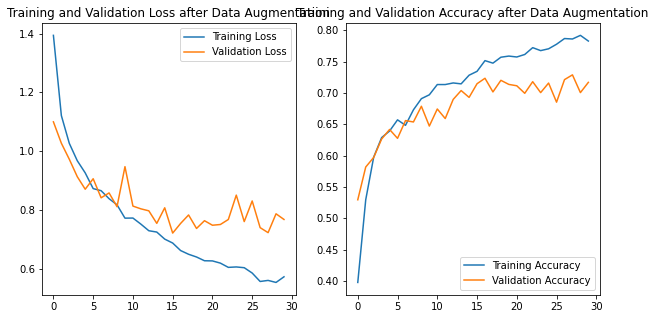

In [25]:
train1_loss = model1_result.history['loss']
train1_accuracy = model1_result.history['accuracy']

val1_loss = model1_result.history['val_loss']
val1_accuracy = model1_result.history['val_accuracy']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train1_loss, label = "Training Loss")
plt.plot(val1_loss, label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss after Data Augmentation")

plt.subplot(1,2,2)
plt.plot(train1_accuracy, label = "Training Accuracy")
plt.plot(val1_accuracy, label = "Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy after Data Augmentation")

The accuracy of the validation set has increased from 66% to 71% by applying Data Augmentation Techniques.

In [74]:
model1.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 4s 120ms/step - loss: 0.7670 - accuracy: 0.7168


[0.7670271992683411, 0.7167755961418152]

### Transfer Learning 

Transfer Learning is using a model trained prviously on a large dataset. I have used the feature extraction layers from the pre-trained model which are attached to a dense layer with 5 units for or classification purpose. 

I have used the MobileNet V2 model pre-trained on ImageNet (dataset consisting of 1.4 M images and 1000 classes) for feature extraction.  

In [75]:
x_tf, y_tf = [],[]

for flower_name, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x_tf.append(resized_img)
        y_tf.append(flowers_label_dict[flower_name])

x_tf = np.array(x_tf)
y_tf = np.array(y_tf)

x_tf_scaled = x_tf / 255

x_tf_train, x_tf_test, y_tf_train, y_tf_test = train_test_split(x_tf_scaled,y_tf,random_state = 42)


In [76]:
img_shape = (224,224)
feature_extraction_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5",input_shape = (224,224,3) , trainable=False)

In [77]:
model2 = Sequential([feature_extraction_layer,
                     layers.Dense(5)])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [78]:
model2.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model2.fit(x_tf_train, y_tf_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 56s 585ms/step - loss: 0.7799 - accuracy: 0.7075
Epoch 2/5
86/86 [==============================] - 45s 523ms/step - loss: 0.4057 - accuracy: 0.8626
Epoch 3/5
86/86 [==============================] - 45s 528ms/step - loss: 0.3237 - accuracy: 0.8953
Epoch 4/5
86/86 [==============================] - 44s 508ms/step - loss: 0.2656 - accuracy: 0.9179
Epoch 5/5
86/86 [==============================] - 44s 512ms/step - loss: 0.2316 - accuracy: 0.9335


In [79]:
model2.evaluate(x_tf_test,y_tf_test)

29/29 [==============================] - 17s 553ms/step - loss: 0.3687 - accuracy: 0.8780


[0.3687465190887451, 0.8779956698417664]

The accuracy has increased to 87% using MobileNet V2 pretained model for classification. 